#NAME :ATUHAIRE PAULINE
#ACCESS NUMBER B35093
#ASSIGNMENT 3

#Vehicle Registration System

This section models a vehicle registration system in Uganda using inheritance and polymorphism.

In [1]:
import json

class Vehicle:
    def __init__(self, plate_number, owner, engine_cc, base_tax):
        self.plate_number = plate_number
        self.owner = owner
        self.engine_cc = engine_cc
        self.base_tax = base_tax

    def calculate_tax(self):
        return self.base_tax

class Car(Vehicle):
    def __init__(self, plate_number, owner, engine_cc, base_tax, passenger_capacity):
        super().__init__(plate_number, owner, engine_cc, base_tax)
        self.passenger_capacity = passenger_capacity

    def calculate_tax(self):
        return self.base_tax + (self.engine_cc * 0.05)

class Truck(Vehicle):
    def __init__(self, plate_number, owner, engine_cc, base_tax, load_capacity):
        super().__init__(plate_number, owner, engine_cc, base_tax)
        self.load_capacity = load_capacity

    def calculate_tax(self):
        return self.base_tax + (self.load_capacity * 0.1)

class Motorbike(Vehicle):
    def __init__(self, plate_number, owner, engine_cc, base_tax, type_):
        super().__init__(plate_number, owner, engine_cc, base_tax)
        self.type = type_

    def calculate_tax(self):
        return self.base_tax + 20000

# Demonstrate polymorphism
vehicles = [
    Car('UAX123A', 'John Doe', 1800, 100000, 5),
    Truck('UBB555B', 'Mary Trucks Ltd', 3000, 150000, 8000),
    Motorbike('UCC999C', 'Peter Rider', 125, 50000, 'boda')
]

data = []
for v in vehicles:
    data.append({
        'plate_number': v.plate_number,
        'owner': v.owner,
        'tax': v.calculate_tax()
    })

with open('vehicle_registry.json', 'w') as f:
    json.dump(data, f, indent=4)

data

[{'plate_number': 'UAX123A', 'owner': 'John Doe', 'tax': 100090.0},
 {'plate_number': 'UBB555B', 'owner': 'Mary Trucks Ltd', 'tax': 150800.0},
 {'plate_number': 'UCC999C', 'owner': 'Peter Rider', 'tax': 70000}]

#Question 2 :SACCO and Loan Eligibility

Abstract base class with subclasses representing SACCO members and their loan eligibility.

In [2]:
from abc import ABC, abstractmethod
import requests

class Member(ABC):
    def __init__(self, name, id_no, savings_balance):
        self.name = name
        self.id_no = id_no
        self.savings_balance = savings_balance

    @abstractmethod
    def loan_eligibility(self):
        pass

    @staticmethod
    def get_exchange_rate():
        try:
            response = requests.get('https://api.exchangerate-api.com/v4/latest/UGX', timeout=5)
            data = response.json()
            return data['rates']['USD']
        except Exception as e:
            print("Error fetching exchange rate:", e)
            return 0.00026  # fallback rate

class TraderMember(Member):
    def loan_eligibility(self):
        return self.savings_balance * 4

class FarmerMember(Member):
    def loan_eligibility(self):
        return self.savings_balance * 6

usd_rate = Member.get_exchange_rate()

members = [
    TraderMember('Alice', 'T001', 200000),
    FarmerMember('Bob', 'F002', 150000)
]

for m in members:
    ugx = m.loan_eligibility()
    usd = ugx * usd_rate
    print(f"{m.name} eligible for UGX {ugx:,} or USD {usd:.2f}")

Alice eligible for UGX 800,000 or USD 232.00
Bob eligible for UGX 900,000 or USD 261.00


#Question 3 : Smart Traffic Light Management

This models a traffic light system using encapsulation and simulated sensor data.

In [3]:
import random
import time

class TrafficLight:
    def __init__(self, location):
        self.location = location
        self.__current_state = 'Red'

    def turn_green(self):
        self.__current_state = 'Green'

    def turn_red(self):
        self.__current_state = 'Red'

    def status(self):
        return self.__current_state

class SmartTrafficLight(TrafficLight):
    def get_car_density(self):
        return random.randint(0, 100)

    def simulate_cycle(self):
        car_density = self.get_car_density()
        green_duration = 30 + int(car_density / 2)
        red_duration = 90 - int(car_density / 2)
        self.turn_green()
        print(f"[{time.strftime('%H:%M')}] {self.location}: Green for {green_duration}s, Red for {red_duration}s")

lights = [SmartTrafficLight('Jinja Road'), SmartTrafficLight('Kampala Road')]

for _ in range(3):
    for light in lights:
        light.simulate_cycle()
    time.sleep(1)

[09:16] Jinja Road: Green for 45s, Red for 75s
[09:16] Kampala Road: Green for 45s, Red for 75s
[09:16] Jinja Road: Green for 54s, Red for 66s
[09:16] Kampala Road: Green for 49s, Red for 71s
[09:16] Jinja Road: Green for 37s, Red for 83s
[09:16] Kampala Road: Green for 31s, Red for 89s


Question4:  Student Grading System

Implements inheritance and JSON serialization for student grading.

In [4]:
import json

class Student:
    def __init__(self, student_id, name, marks):
        self.student_id = student_id
        self.name = name
        self.marks = marks

    def total(self):
        return sum(self.marks.values())

    def average(self):
        return self.total() / len(self.marks)

    def grade(self):
        avg = self.average()
        if avg >= 80: return 'A'
        elif avg >= 70: return 'B'
        elif avg >= 60: return 'C'
        elif avg >= 50: return 'D'
        else: return 'F'

class PostgraduateStudent(Student):
    def __init__(self, student_id, name, marks, research_topic):
        super().__init__(student_id, name, marks)
        self.research_topic = research_topic

    def evaluate_thesis(self):
        return 'Pass' if self.average() >= 70 else 'Revise'

students = [
    PostgraduateStudent('PG001', 'Jane Doe', {'AI':85, 'ML':78, 'Stats':88}, 'AI in Healthcare')
]

data = [{
    'id': s.student_id,
    'name': s.name,
    'grade': s.grade(),
    'thesis': s.evaluate_thesis()
} for s in students]

with open('students.json', 'w') as f:
    json.dump(data, f, indent=4)

data

[{'id': 'PG001', 'name': 'Jane Doe', 'grade': 'A', 'thesis': 'Pass'}]

#Question 5 Uganda Music Analytics

Simulates music analytics for Ugandan artists using pandas and seaborn.

    artist         track   plays  popularity country
0    Azawi  Slow Dancing  120000          85  Uganda
1  Sheebah       Nkutuse   95000          78  Uganda


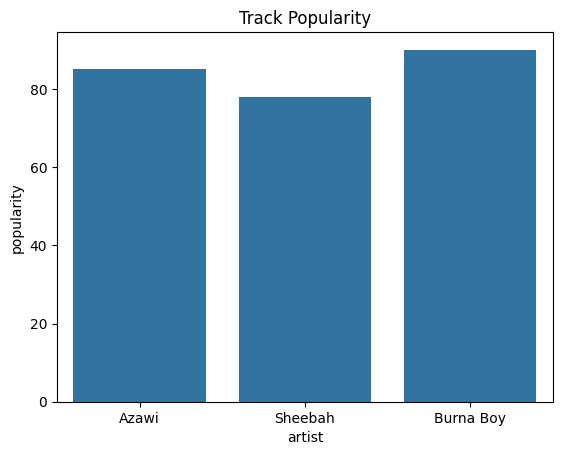

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

mock_data = [
    {'artist': 'Azawi', 'track': 'Slow Dancing', 'plays': 120000, 'popularity': 85, 'country': 'Uganda'},
    {'artist': 'Sheebah', 'track': 'Nkutuse', 'plays': 95000, 'popularity': 78, 'country': 'Uganda'},
    {'artist': 'Burna Boy', 'track': 'Kilometre', 'plays': 200000, 'popularity': 90, 'country': 'Nigeria'}
]

df = pd.DataFrame(mock_data)

class UgandaMusicAnalytics:
    def __init__(self, dataframe):
        self.df = dataframe

    def top_tracks(self):
        return self.df.sort_values(by='popularity', ascending=False)

    def plot_popularity(self):
        sns.barplot(data=self.df, x='artist', y='popularity')
        plt.title('Track Popularity')
        plt.show()

class LocalArtistAnalytics(UgandaMusicAnalytics):
    def local_tracks(self):
        return self.df[self.df['country'] == 'Uganda']

uma = LocalArtistAnalytics(df)
print(uma.local_tracks())
uma.plot_popularity()

#Question6 Exchange Rate Data Pipeline

Analyzes exchange rate trends using pandas, numpy, and matplotlib.

/tmp/ipython-input-1345692830.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'date': pd.date_range('2025-01-01', periods=6, freq='M'),


          USD     GBP     EUR
month                        
1      3800.0  4800.0  4200.0
2      3820.0  4850.0  4230.0
3      3850.0  4870.0  4250.0
4      3840.0  4900.0  4280.0
5      3830.0  4920.0  4300.0
6      3860.0  4950.0  4320.0


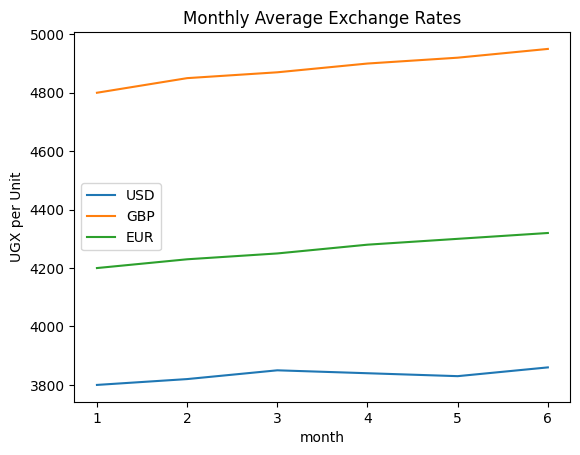

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = {
    'date': pd.date_range('2025-01-01', periods=6, freq='M'),
    'USD': [3800, 3820, 3850, 3840, 3830, 3860],
    'GBP': [4800, 4850, 4870, 4900, 4920, 4950],
    'EUR': [4200, 4230, 4250, 4280, 4300, 4320]
}

df = pd.DataFrame(data)
df['month'] = df['date'].dt.month

avg_rates = df.groupby('month')[['USD', 'GBP', 'EUR']].mean()
print(avg_rates)

avg_rates.plot(title='Monthly Average Exchange Rates')
plt.ylabel('UGX per Unit')
plt.show()

df.to_csv('exchange_rates.csv', index=False)
df.to_json('exchange_rates.json', orient='records', indent=4)